# Word Vector learning with Word2Vec

This notebook will help you get started with the skip-gram and CBOW model of word vector learning. Here we'll be using the `gensim` toolkit for python, which reimplements the code for training and evaluation of the models. Feel free to play with the orginal C code at https://code.google.com/archive/p/word2vec/ also.

The first step is to load the library into python. Note that you will need `gensim` and its dependent libraries as well as `nltk` installed in your environment. If you see an error importing these below, you'll need to `pip install` a few packages. 

In [1]:
import gensim 
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

For the purpose of this we will use part of the Brown corpus. Note that for the word vectors to be meaningful you need much more text than this. However the code will run slowly, so we'll just consider a subset for the moment. In general you need to use much bigger corpora, e.g., all of Wikipedia, and train the model for hours or days. 

In [2]:
import nltk
corpus = nltk.corpus.brown.sents() # make the corpus smaller if you want the code to run more quickly

This next line trains the model on the corpus, modelling all words that occur in the corpus. You can prune the vocabulary using the 'min_count' option, such that only words seen several times are included. This helps to make things faster and avoid modelling what might be typographical errors or other noise in the dataset.

In [3]:
model = gensim.models.Word2Vec(corpus, min_count=1, workers=2, iter=5) # workers = number of threads
# takes a minute or so

To see the various options for training the model, please read the help (see below, this will pop up a help window). For example the 'sg' option allows you to swap between the CBOW and skip-gram models. You can compare the results for running with both models by rerunning the training command above with this option. Consider 'size' also, which sets the number of hidden dimensions. There are a plethora of other parameters which can also have a big effect on the model quality and runtime.

In [4]:
gensim.models.Word2Vec?

Before going any further, you probably want to save your model to avoid the need to re-run the slow training step.

In [5]:
model.save('brown_skipgram.model')

## Evaluation

Now let's interrogate the model to see how similar various words are. Please try out some words yourself, to see whether its uncovered sensible or otherwise interesting relations. 

In [12]:
words = "woman women man girl boy green blue did".split()
for w1 in words:
    for w2 in words:
        print w1, w2, model.similarity(w1, w2)

woman woman 1.0
woman women 0.724979814516
woman man 0.913922396593
woman girl 0.950781602777
woman boy 0.955999658932
woman green 0.633946316542
woman blue 0.583531575019
woman did 0.484219980528
women woman 0.724979814516
women women 1.0
women man 0.539063898473
women girl 0.759777097364
women boy 0.689256497765
women green 0.689633677875
women blue 0.713584640205
women did 0.459368382417
man woman 0.913922396593
man women 0.539063898473
man man 1.0
man girl 0.864513149885
man boy 0.858248407138
man green 0.388007547995
man blue 0.352012725484
man did 0.394443808107
girl woman 0.950781602777
girl women 0.759777097364
girl man 0.864513149885
girl girl 1.0
girl boy 0.957070508914
girl green 0.731545392763
girl blue 0.697093186032
girl did 0.522418122859
boy woman 0.955999658932
boy women 0.689256497765
boy man 0.858248407138
boy girl 0.957070508914
boy boy 1.0
boy green 0.682828942769
boy blue 0.638570980854
boy did 0.475511345814
green woman 0.633946316542
green women 0.689633677875
g

It's a little easier to see if we plot this in a graph. Let's form a matrix with the words as rows and columns, and cells being the similarity values. We can then display this as if it were an image, and see clusters of items more clearly.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

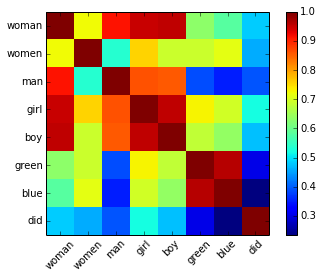

In [14]:
M = np.zeros((len(words), len(words)))
for i, w1 in enumerate(words):
    for j, w2 in enumerate(words):
        M[i,j] = model.similarity(w1, w2)
        
plt.imshow(M, interpolation='nearest')
plt.colorbar()

ax = plt.gca()
ax.set_xticklabels([''] + words, rotation=45)
ax.set_yticklabels([''] + words)

You can also find the 'k' most similar words to a given word. There's a lot of gibberish when trained on a small corpus. You should try increasing the size of the training data to see the difference.

In [15]:
model.most_similar(positive=['woman'], topn=10)

[(u'boy', 0.9559996128082275),
 (u'girl', 0.9507816433906555),
 (u'child', 0.9477106928825378),
 (u'Jew', 0.9387968182563782),
 (u'old', 0.9340560436248779),
 (u'artist', 0.9310867190361023),
 (u'writer', 0.9247554540634155),
 (u'grudge', 0.9172593355178833),
 (u'young', 0.9158708453178406),
 (u'man', 0.9139224290847778)]

Have more of a play with the 'most_similar' method, using the 'negative' option to perform vector difference in order to evaluate king-man+woman = ??? and similar.

In [ ]:
your code goes here...

## Quantitative evaluation

For more quantitative evaluation, download this file to the current working directory https://raw.githubusercontent.com/nicholas-leonard/word2vec/master/questions-words.txt and see if your model gets many of these values correct. You will want to train on the full Brown corpus to give the model enough data to learn some of these relations.

In [17]:
# download the file
import urllib2
uin = urllib2.urlopen('https://raw.githubusercontent.com/nicholas-leonard/word2vec/master/questions-words.txt')
fout = open('questions-words.txt', 'w')
fout.write(uin.read())

In [18]:
# evaluate the model, warning - this can be slow
model.accuracy('questions-words.txt')

[{'correct': [(u'HAVANA', u'CUBA', u'MOSCOW', u'RUSSIA')],
  'incorrect': [(u'ATHENS', u'GREECE', u'BERLIN', u'GERMANY'),
   (u'ATHENS', u'GREECE', u'BERN', u'SWITZERLAND'),
   (u'ATHENS', u'GREECE', u'CAIRO', u'EGYPT'),
   (u'ATHENS', u'GREECE', u'HAVANA', u'CUBA'),
   (u'ATHENS', u'GREECE', u'LONDON', u'ENGLAND'),
   (u'ATHENS', u'GREECE', u'MOSCOW', u'RUSSIA'),
   (u'ATHENS', u'GREECE', u'OSLO', u'NORWAY'),
   (u'ATHENS', u'GREECE', u'PARIS', u'FRANCE'),
   (u'ATHENS', u'GREECE', u'ROME', u'ITALY'),
   (u'ATHENS', u'GREECE', u'TOKYO', u'JAPAN'),
   (u'BERLIN', u'GERMANY', u'BERN', u'SWITZERLAND'),
   (u'BERLIN', u'GERMANY', u'CAIRO', u'EGYPT'),
   (u'BERLIN', u'GERMANY', u'HAVANA', u'CUBA'),
   (u'BERLIN', u'GERMANY', u'LONDON', u'ENGLAND'),
   (u'BERLIN', u'GERMANY', u'MOSCOW', u'RUSSIA'),
   (u'BERLIN', u'GERMANY', u'OSLO', u'NORWAY'),
   (u'BERLIN', u'GERMANY', u'PARIS', u'FRANCE'),
   (u'BERLIN', u'GERMANY', u'ROME', u'ITALY'),
   (u'BERLIN', u'GERMANY', u'TOKYO', u'JAPAN'),
   

## Using 'big data' 

Finally let's use a model trained on masses of data. This is courtesy of Google Research who've trained a 300d model on terabytes of text, and provided the trained model files. NLTK includes a vocabulary restricted snippet which is fairly compact.

In [21]:
from nltk.data import find
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
big_model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

How does it differs from the small model? Try some of the above tests to see whether the vectors to appear to better capture the characteristics of words. 

In [22]:
big_model.most_similar(positive=['woman'], topn=10)

[(u'man', 0.7664011716842651),
 (u'girl', 0.749464213848114),
 (u'teenager', 0.6317085027694702),
 (u'lady', 0.628878653049469),
 (u'mother', 0.6076304316520691),
 (u'boy', 0.5975908637046814),
 (u'Woman', 0.5770983099937439),
 (u'she', 0.5641393661499023),
 (u'person', 0.5470173358917236),
 (u'housewife', 0.5463820695877075)]

Try the quantative evaluation above for the big model. Does it perform better? Come up with some tests for different relation types, e.g., city-state, place-sport team, hyper-hyponym, tense, number, etc and see if the model can capture these well.

In [ ]:
your code goes here...

You can play with the full set of learned vectors, although be warned it's a rather big file https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

Or you might want to train your own vectors on your own corpus. 